In [1]:
import pandas as pd
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df_ML_2class = pd.read_csv("./df_ML_2class_complete.tsv", sep = '\t', low_memory=False)
#df_ML_2classy = pd.read_csv("./df_ML_2class_BA.txt", sep = '\t')
df_ML_ = pd.read_csv("./df_ML_complete.tsv", sep = '\t', low_memory=False)
    
print(df_ML_2class.columns) 
df_ML_.columns

Index(['Mol_Name', 'Mol_#', 'Smiles', 'IC50_(nM)', 'ABC', 'ABCGG', 'nAcid',
       'nBase', 'SpAbs_A', 'SpMax_A',
       ...
       'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'mZagreb1',
       'mZagreb2', 'pIC50_norm', 'Bioactivity_class'],
      dtype='object', length=1832)


Index(['Mol_Name', 'Mol_#', 'Smiles', 'IC50_(nM)', 'ABC', 'ABCGG', 'nAcid',
       'nBase', 'SpAbs_A', 'SpMax_A',
       ...
       'MW', 'AMW', 'WPath', 'WPol', 'Zagreb1', 'Zagreb2', 'mZagreb1',
       'mZagreb2', 'pIC50_norm', 'Bioactivity_class'],
      dtype='object', length=1832)

In [78]:

for column in df_ML_2class.columns:
    if column not in ['Mol_Name', 'Mol_#', 'Smiles', 'IC50_(nM)','Bioactivity_class']:
        for idx, elem in enumerate(df_ML_2class[column]):
        
            try:
                elem/10
            except:
                df_ML_2class.loc[idx,column] = 0.0
                
for column in df_ML_.columns:
    if column not in ['Mol_Name', 'Mol_#', 'Smiles', 'IC50_(nM)','Bioactivity_class']:
        for idx, elem in enumerate(df_ML_[column]):
        
            try:
                elem/10
            except:
                df_ML_.loc[idx,column] = 0.0                
    
df_ML_2class


KeyboardInterrupt: 

In [ ]:
# Distribuição dos dados segundo o PCA (Machine Learning Não Supervisionado)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#pegar os dados dos dos descritores do DF principal
df_ML_2class_NS = df_ML_2class.iloc[:,4:-1]
df_ML_NS = df_ML_.iloc[:,4:-1]
# Pre-procesamento "centrar na media para
#colocar os dados no origem para pegar a maxima variança dos dados
#y  dividir pelo desvio padrão para dar o mesmo peso para os dados 
#de cada varaivel para colocar na mesma faixa de valores" a AUTO ESCALAR OS DADOS
Xa = StandardScaler().fit_transform(df_ML_2class_NS)
Xa.shape


In [5]:
#foi feito o uso de 433 componentes para garantir a representação do 99% dos dados
pca = PCA(n_components = 433) #vou representar as 1520 colunas"descritores" em 433
pca.fit(Xa) #fit é para fazer o ajuste dos dados
print((pca.explained_variance_ratio_))#varianza explicada, cada nova coluna explica uma percentagem da varianza original

print(np.cumsum(pca.explained_variance_ratio_))# np. cumsum () suma acumulada 
print(pca.singular_values_)#valores singulares que dão uma ideia da varianza que esta sendo explicada


[2.95095125e-01 1.03642473e-01 6.27431743e-02 4.99868637e-02
 3.79252927e-02 3.02863901e-02 2.92346604e-02 2.30444675e-02
 2.10909327e-02 1.73305766e-02 1.59770541e-02 1.50262061e-02
 1.40127258e-02 1.37921174e-02 1.28100460e-02 1.16173260e-02
 9.90004523e-03 8.98624118e-03 8.38642583e-03 7.71865316e-03
 7.46394795e-03 6.82516614e-03 6.55874554e-03 6.09112531e-03
 5.97665078e-03 5.86058122e-03 5.66740274e-03 5.05890906e-03
 4.88535484e-03 4.81660408e-03 4.35465690e-03 4.27944672e-03
 4.07637743e-03 3.88044709e-03 3.82815461e-03 3.66097878e-03
 3.45620792e-03 3.17432375e-03 3.06255617e-03 2.99088325e-03
 2.92747422e-03 2.83477057e-03 2.79020291e-03 2.73487345e-03
 2.68444839e-03 2.62852140e-03 2.51870107e-03 2.41311655e-03
 2.40670901e-03 2.30267109e-03 2.22693267e-03 2.14155857e-03
 2.10741258e-03 2.01697102e-03 1.98294996e-03 1.94855526e-03
 1.90988072e-03 1.85388010e-03 1.80151216e-03 1.77168313e-03
 1.70284761e-03 1.67309792e-03 1.65306784e-03 1.63086179e-03
 1.59128616e-03 1.561513

In [6]:
L = pca.components_.T# cada linha do array representa os pesos de cada variavel original nas novas variaveis

In [7]:
L

array([[ 0.05303025, -0.00527129, -0.0097448 , ..., -0.00054826,
        -0.00074569,  0.00405605],
       [ 0.05111246, -0.02059784,  0.00885743, ...,  0.00291352,
        -0.01920814, -0.01113892],
       [ 0.00019416, -0.00670279,  0.00674294, ...,  0.00192382,
         0.00094815,  0.00196225],
       ...,
       [ 0.04546815, -0.01580936,  0.03559578, ...,  0.00636053,
        -0.006551  ,  0.01084731],
       [ 0.05217003,  0.00681458, -0.01197701, ...,  0.00338154,
         0.01261688, -0.00875738],
       [-0.00202291,  0.00311225,  0.00686603, ..., -0.00077715,
         0.00069623,  0.0009225 ]])

In [8]:
T = pca.transform(Xa)

In [9]:
T

array([[ 1.08657979e+01, -1.40683503e+01, -4.33061354e+00, ...,
         1.69380178e-02, -2.34385595e-03,  1.83253477e-02],
       [-8.44681422e+00,  1.13581073e+01, -3.05470249e+00, ...,
        -3.11183533e-02, -7.43086883e-03, -3.03274698e-02],
       [-2.76249934e+01, -6.09940267e+00, -3.35918736e+00, ...,
         7.68743406e-02,  6.27395697e-02,  5.68319361e-02],
       ...,
       [ 2.92251327e+01,  7.60087422e+00,  6.46621932e+00, ...,
         1.74629041e-02, -5.68175779e-03, -1.55219726e-02],
       [-1.91901167e+01,  5.41464594e+00, -2.38608038e+00, ...,
         3.17116674e-02, -2.52501529e-03, -2.00646348e-03],
       [-7.13982954e+00, -1.18451208e+01,  1.12292382e+01, ...,
         5.86769115e-02, -3.28287933e-03, -2.70309652e-02]])

# GRAFICO EM 3D DISTRIBUIÇÃO DAS MOLECULAS E AGRUPAÇÃO ESPECIES ATIVAS E INATIVAS

In [11]:
#GRAFICO PCA
import plotly.express as px
import plotly.graph_objects as go

dados=pd.DataFrame(T)
dados.columns=["PC"+str(i+1) for i in range(dados.shape[1])]

fig=px.scatter_3d(dados,x="PC1",y="PC2",z="PC3",
                  color=df_ML_2class.iloc[:,-1],
                  size=df_ML_2class.iloc[:,-2]*3.,
                  size_max=30,
                  opacity=1,
                  hover_data= [df_ML_2class.iloc[:,0],df_ML_2class.iloc[:,-1],df_ML_2class.iloc[:,10]]
                 )
fig.show()
#grafico em 3D tendo enconta a cor como a classificação inicial das especies entre ativas e inativas para tentar escolher
#o modelo de classificação segundo a distribuição dos dados


# AGRUPAÇÃO DOS DESCRITORES MOLECULARES

In [12]:
#Grafico da matriz dos pesos para olhar a contribuição dos descritores e
#tentar relacionar os descritores que mais representan a atividade biologica
dados1=pd.DataFrame(L)
dados1.columns=["PC"+str(i+1) for i in range(dados1.shape[1])]
size=[10 for i in range(len(dados1))]
fig1=px.scatter_3d(dados1,x="PC1",y="PC2",z="PC3", 
                   color=df_ML_2class_NS.columns, 
                   size=size, 
                   size_max=10, 
                   opacity=1, 
                   hover_data= [df_ML_2class_NS.columns])
fig1.show()


# PREPARAÇÃO PARA O APRENDIZADO DE MAQUINA SUPERVISIONADO

In [10]:
#Criação da coluna Binary_bioactivity para representar a atividade (0 para especie inativa
# e 1 para especie ativa)
Binary_bioactivity = []
for i in df_ML_2class.loc[:,"Bioactivity_class"]:
    if i == "Active":
        Binary_bioactivity.append(1)
    else:
        Binary_bioactivity.append(0)
#Adição da coluna ao DF de duas calses

df_Xa = pd.DataFrame(Xa)
df_Xa["Binary_bioactivity"] = Binary_bioactivity
df_Xa


0         1         2         3         4         5         6  \
0     0.565120  0.663337 -0.103594 -1.017219  0.620912  1.078953  1.479404   
1    -0.432708 -0.555398 -0.103594  0.369743 -0.382220 -0.726233 -1.149061   
2    -1.504955 -1.409778 -0.103594 -1.017219 -1.565320  0.992676  0.856155   
3    -0.127306 -0.221935 -0.103594  0.369743 -0.126596 -0.107197 -0.620676   
4    -1.430288 -1.334607 -0.103594 -1.017219 -1.517141 -0.730208 -0.570022   
...        ...       ...       ...       ...       ...       ...       ...   
1623 -1.504955 -1.413346 -0.103594 -1.017219 -1.542022  0.982270  0.836745   
1624 -0.847516 -0.826947 -0.103594 -1.017219 -0.917369  0.432532  0.747136   
1625  1.398131  1.137142 -0.103594 -1.017219  1.402764  0.391752  0.700939   
1626 -1.034976 -1.107909 -0.103594  0.369743 -1.089479 -0.373390 -1.002314   
1627 -0.449691  0.244457 -0.103594 -1.017219 -0.569824  0.097376  0.367469   

             7         8         9  ...      1818      1819      1820  \
0     0.620912  1.299405  0.682502  ...  0.353897  0.184774 -0.165570   
1    -0.382220  0.859115 -0.337650  ... -0.567576 -0.669239 -0.441112   
2    -1.565320  0.944662 -1.741949  ... -1.576460  0.994418 -1.001572   
3    -0.126596  1.040802 -0.000086  ... -0.309513 -0.031165 -0.338880   
4    -1.517141 -1.981135 -1.644092  ... -1.231583  0.016065 -0.911438   
...        ...       ...       ...  ...       ...       ...       ...   
1623 -1.542022  1.345603 -1.741967  ... -1.576460  0.994418 -1.001269   
1624 -0.917369  0.096964 -0.821146  ... -0.886889  0.307055 -0.811021   
1625  1.402764  0.070394  1.285586  ...  1.363207 -1.200045  1.619552   
1626 -1.089479 -0.646484 -1.078356  ... -1.136421 -0.467758 -0.762325   
1627 -0.569824 -2.342324 -0.322933  ... -0.154907  0.686206 -0.569960   

          1821      1822      1823      1824      1825      1826  \
0     1.238972  0.765215  0.954348  0.215037  0.457693 -0.592004   
1    -0.762066 -0.485211 -0.532690 -0.979256 -0.475836 -0.442805   
2    -1.232899 -1.304456 -1.086007 -1.667492 -1.759438 -0.546464   
3    -0.291234 -0.054030 -0.013956 -0.675622 -0.315386 -0.577380   
4    -1.232899 -1.390692 -1.362665 -0.582002 -1.431244 -0.701930   
...        ...       ...       ...       ...       ...       ...   
1623 -1.232899 -1.304456 -1.086007 -1.667492 -1.759438  0.860944   
1624 -0.526650 -0.743920 -0.636437 -0.898287 -1.030118 -0.452370   
1625  1.474389  1.368868  1.334753  1.523191  1.391221 -0.508167   
1626 -1.174045 -1.045747 -1.051424 -0.888166 -1.088464  0.429690   
1627 -0.232380 -0.442093 -0.463526  1.128468 -0.329972 -0.550627   

      Binary_bioactivity  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
1623                   1  
1624                   0  
1625                   0  
1626                   1  
1627                   0  

[1628 rows x 1828 columns]

In [11]:
df_Xareg = pd.DataFrame(Xa)
df_Xareg["pIC50"] = df_ML_2class.iloc[:,-2]
df_Xareg

0         1         2         3         4         5         6  \
0     0.565120  0.663337 -0.103594 -1.017219  0.620912  1.078953  1.479404   
1    -0.432708 -0.555398 -0.103594  0.369743 -0.382220 -0.726233 -1.149061   
2    -1.504955 -1.409778 -0.103594 -1.017219 -1.565320  0.992676  0.856155   
3    -0.127306 -0.221935 -0.103594  0.369743 -0.126596 -0.107197 -0.620676   
4    -1.430288 -1.334607 -0.103594 -1.017219 -1.517141 -0.730208 -0.570022   
...        ...       ...       ...       ...       ...       ...       ...   
1623 -1.504955 -1.413346 -0.103594 -1.017219 -1.542022  0.982270  0.836745   
1624 -0.847516 -0.826947 -0.103594 -1.017219 -0.917369  0.432532  0.747136   
1625  1.398131  1.137142 -0.103594 -1.017219  1.402764  0.391752  0.700939   
1626 -1.034976 -1.107909 -0.103594  0.369743 -1.089479 -0.373390 -1.002314   
1627 -0.449691  0.244457 -0.103594 -1.017219 -0.569824  0.097376  0.367469   

             7         8         9  ...      1818      1819      1820  \
0     0.620912  1.299405  0.682502  ...  0.353897  0.184774 -0.165570   
1    -0.382220  0.859115 -0.337650  ... -0.567576 -0.669239 -0.441112   
2    -1.565320  0.944662 -1.741949  ... -1.576460  0.994418 -1.001572   
3    -0.126596  1.040802 -0.000086  ... -0.309513 -0.031165 -0.338880   
4    -1.517141 -1.981135 -1.644092  ... -1.231583  0.016065 -0.911438   
...        ...       ...       ...  ...       ...       ...       ...   
1623 -1.542022  1.345603 -1.741967  ... -1.576460  0.994418 -1.001269   
1624 -0.917369  0.096964 -0.821146  ... -0.886889  0.307055 -0.811021   
1625  1.402764  0.070394  1.285586  ...  1.363207 -1.200045  1.619552   
1626 -1.089479 -0.646484 -1.078356  ... -1.136421 -0.467758 -0.762325   
1627 -0.569824 -2.342324 -0.322933  ... -0.154907  0.686206 -0.569960   

          1821      1822      1823      1824      1825      1826     pIC50  
0     1.238972  0.765215  0.954348  0.215037  0.457693 -0.592004  4.823909  
1    -0.762066 -0.485211 -0.532690 -0.979256 -0.475836 -0.442805  5.129596  
2    -1.232899 -1.304456 -1.086007 -1.667492 -1.759438 -0.546464  4.917215  
3    -0.291234 -0.054030 -0.013956 -0.675622 -0.315386 -0.577380  4.853872  
4    -1.232899 -1.390692 -1.362665 -0.582002 -1.431244 -0.701930  4.598686  
...        ...       ...       ...       ...       ...       ...       ...  
1623 -1.232899 -1.304456 -1.086007 -1.667492 -1.759438  0.860944  7.800794  
1624 -0.526650 -0.743920 -0.636437 -0.898287 -1.030118 -0.452370  5.110000  
1625  1.474389  1.368868  1.334753  1.523191  1.391221 -0.508167  4.995679  
1626 -1.174045 -1.045747 -1.051424 -0.888166 -1.088464  0.429690  6.917215  
1627 -0.232380 -0.442093 -0.463526  1.128468 -0.329972 -0.550627  4.908685  

[1628 rows x 1828 columns]

# FUNÇÕES KENNARD-STONE PARA ESCOLHER O TREINO E O TESTE


In [12]:

#seleção dos conjuntos treino e test metodo Kennard-Stone######################################################


from scipy.spatial.distance import cdist
def max_min_distance_split(distance, train_size):
    """sample set split method based on maximun minimun distance, which is the core of Kennard Stone
    method
    Parameters
    ----------
    distance : distance matrix
        semi-positive real symmetric matrix of a certain distance metric
    train_size : train data sample size
        should be greater than 2
    Returns
    -------
    select_pts: list
        index of selected spetrums as train data, index is zero-based
    remaining_pts: list
        index of remaining spectrums as test data, index is zero-based
    """

    select_pts = []
    remaining_pts = [x for x in range(distance.shape[0])]

    # first select 2 farthest points
    first_2pts = np.unravel_index(np.argmax(distance), distance.shape)
    select_pts.append(first_2pts[0])
    select_pts.append(first_2pts[1])

    # remove the first 2 points from the remaining list
    remaining_pts.remove(first_2pts[0])
    remaining_pts.remove(first_2pts[1])

    for i in range(train_size - 2):
        # find the maximum minimum distance
        select_distance = distance[select_pts, :]
        min_distance = select_distance[:, remaining_pts]
        min_distance = np.min(min_distance, axis=0)
        max_min_distance = np.max(min_distance)

        # select the first point (in case that several distances are the same, choose the first one)
        points = np.argwhere(select_distance == max_min_distance)[:, 1].tolist()
        for point in points:
            if point in select_pts:
                pass
            else:
                select_pts.append(point)
                remaining_pts.remove(point)
                break
    return select_pts, remaining_pts




def kennardstone(spectra, test_size=0.3, metric='euclidean', *args, **kwargs):
    """Kennard Stone Sample Split method
    Parameters
    ----------
    spectra: ndarray, shape of i x j
        i spectrums and j variables (wavelength/wavenumber/ramam shift and so on)
    test_size : float, int
        if float, then round(i x (1-test_size)) spectrums are selected as test data, by default 0.25
        if int, then test_size is directly used as test data size
    metric : str, optional
        The distance metric to use, by default 'euclidean'
        See scipy.spatial.distance.cdist for more infomation
    Returns
    -------
    select_pts: list
        index of selected spetrums as train data, index is zero based
    remaining_pts: list
        index of remaining spectrums as test data, index is zero based
    References
    --------
    Kennard, R. W., & Stone, L. A. (1969). Computer aided design of experiments.
    Technometrics, 11(1), 137-148. (https://www.jstor.org/stable/1266770)
    """

    if test_size < 1:
        train_size = round(spectra.shape[0] * (1 - test_size))
    else:
        train_size = spectra.shape[0] - round(test_size)

    if train_size > 2:
        distance = cdist(spectra, spectra, metric=metric, *args, **kwargs)
        select_pts, remaining_pts = max_min_distance_split(distance, train_size)
    else:
        raise ValueError("train sample size should be at least 2")

    return select_pts, remaining_pts
Xa = np.array(df_Xa)
Set_Train_Test = kennardstone(Xa)
Xareg = np.array(df_Xareg)
Set_Train_Test_reg = kennardstone(Xareg)



In [13]:
Set_Train = Set_Train_Test[0]
Set_Test = Set_Train_Test[1]
Set_Train_reg = Set_Train_Test_reg[0]
Set_Test_reg = Set_Train_Test_reg[1]

In [14]:

#Separação dos conjuntos Train e Test  e suas respetivas variaveis X e y
X_train = []
y_train = []
X_test = []
y_test = []

No_mol_train = 0
No_mol_test = 0
for i in range (len(df_Xa)):
    if i in Set_Train:
        No_mol_train += 1        
        X_train.append(df_Xa.iloc[i,:-1])
        y_train.append(df_Xa.iloc[i,-1])
    if i in Set_Test:
        No_mol_test += 1
        X_test.append(df_Xa.iloc[i,:-1])
        y_test.append(df_Xa.iloc[i,-1])

X_train_reg = []
y_train_reg = []
X_test_reg = []
y_test_reg = []

No_mol_train_reg = 0
No_mol_test_reg = 0        
for i in range (len(df_Xareg)):
    if i in Set_Train_reg:
        No_mol_train_reg += 1        
        X_train_reg.append(df_Xareg.iloc[i,:-1])
        y_train_reg.append(df_Xareg.iloc[i,-1])
    if i in Set_Test_reg:
        No_mol_test_reg += 1
        X_test_reg.append(df_Xareg.iloc[i,:-1])
        y_test_reg.append(df_Xareg.iloc[i,-1])  
        
print("O numero de moleculas para o Train é:  {}".format(No_mol_train)) 
print("O numero de moleculas para o Test é:  {}".format(No_mol_test))

print("O numero de moleculas para o Train reg é:  {}".format(No_mol_train_reg)) 
print("O numero de moleculas para o Test reg é:  {}".format(No_mol_test_reg))

O numero de moleculas para o Train é:  1140
O numero de moleculas para o Test é:  488
O numero de moleculas para o Train reg é:  1140
O numero de moleculas para o Test reg é:  488


# CONFUSSION MATRIX

In [15]:
#matrix confução para obter um reusltado mais facil de visualizar
###############################################################################
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax,cm
######################################################################################

#  Linear Discriminant (LDA) Model

In [16]:
#importar o metodo classificatorio LDA foi escolhido para maximizar as dsitancias entre
#as duas classes que nos temos e para minimizar as distancias entre as amostras da mesma
#classe
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
#Dados separados em train e teste em data frame e fazer auto escalamento
df_X_train=pd.DataFrame(X_train)
df_y_train=pd.DataFrame(y_train)
df_X_test=pd.DataFrame(X_test)
df_y_test=pd.DataFrame(y_test)
#Dados totais
X=df_X_train.append(df_X_test)
y=df_y_train.append(df_y_test)
lda.fit(X_train,y_train)
#como se for o meu R^2
print(lda.score(X_train,y_train))
#prova de predição
print(lda.predict_proba(X_train))
#variancia segundo os atributos ( numero de calses-1)
print(lda.explained_variance_ratio_)

0.9991228070175439
[[1.00000000e+00 1.86029645e-17]
 [1.00000000e+00 9.71282502e-11]
 [1.00000000e+00 1.62616475e-13]
 ...
 [9.99959420e-01 4.05798544e-05]
 [7.69162511e-13 1.00000000e+00]
 [1.00000000e+00 2.57560429e-11]]
[1.]


Confusion matrix, without normalization
[[231  23]
 [ 47 187]]
Normalized confusion matrix
[[0.90944882 0.09055118]
 [0.2008547  0.7991453 ]]


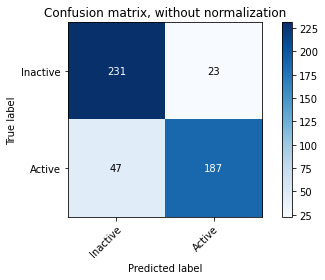

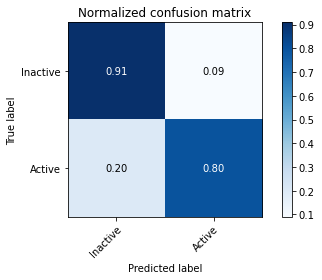

In [17]:
y_pred = lda.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
class_names = np.array(["Inactive","Active"])
ax,cmlda = plot_confusion_matrix(np.array(y_test), y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [18]:
Sensibilidade=100*cmlda[1][1] / (cmlda[1][1] + cmlda[1][0])
Seletividade=100*cmlda[0][0] / (cmlda[0][0] + cmlda[0][1])
Exatidão=100*(cmlda[1][1] + cmlda[0][0]) / (cmlda[1][1] + cmlda[1][0] + cmlda[0][1] + cmlda[0][0])

print("Os parametros do Modelo Classificatorio criado são:\nSensibilidade de {:.2f}% \nSeletividade de {:.2f}% \nExatidão de {:.2f}%".format(Sensibilidade,Seletividade,Exatidão))

Os parametros do Modelo Classificatorio criado são:
Sensibilidade de 79.91% 
Seletividade de 90.94% 
Exatidão de 85.66%


In [19]:
count = 0
for i in lda.coef_[0]:
    if abs(i) >= 200:
        print (i)
        count += 1
print (" ")
print (" ")
print (count)

443.29100976170525
-502.2865881355732
-252.87047251678376
-326.5688088745959
-231.73291851970723
-997.8706176650571
521.8971300036584
-374.2886783993376
254.16063201763663
230.99211132184885
-784.617901292928
-4894.0760805088485
1148.5317765555465
-508.2512223454254
-367.82746238926313
-365.2520366349911
-825.0144091942027
280.4739021335054
-388.39394600487105
838.7811184420816
-815.3470728868415
-1099.6599705388785
1814.657301992197
-862.0911159238904
527.8381153251371
1071.3178129358762
-429.73657620434386
535.3359290378179
795.8574665476622
221.6254529240016
1250.006837103408
-1738.8849953221206
767.104507600739
-457.0338569776309
-726.431902156254
-438.11940432094565
2434.911636478418
-779.6024750260685
566.0707104817924
605.7955127058594
-1165.5068739597214
1486.0200344577727
894.7978802396027
-237.19372986905523
-288.2123565765804
-316.15182600166054
1202.4760781845775
610.6529293131416
-878.6063282049927
4767.503590289132
1385.5355403314395
223.51915509098163
-225.38654501805198

In [55]:
# Quadratic Discriminant Analise (QDA) Model

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)
print(qda.score(X_train,y_train))
print(qda.predict_proba(X_test))

In [ ]:
y_pred = qda.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
ax,cmqda = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
Sensibilidade=100*cmqda[1][1] / (cmqda[1][1] + cmqda[1][0])
Seletividade=100*cmqda[0][0] / (cmqda[0][0] + cmqda[0][1])
Exatidão=100*(cmqda[1][1] + cmqda[0][0]) / (cmqda[1][1] + cmqda[1][0] + cmqda[0][1] + cmqda[0][0])

print("Os parametros do Modelo Classificatorio criado são:\nSensibilidade de {:.2f}% \nSeletividade de {:.2f}% \nExatidão de {:.2f}%".format(Sensibilidade,Seletividade,Exatidão))

# Support Vector Machine (SVM) Model

In [20]:
from sklearn.svm import SVC
svc = SVC(C=51,gamma="auto",decision_function_shape= 'ovo', kernel= 'rbf')
svc.fit(X_train,y_train)
print(svc.score(X_train,y_train))
print(svc.predict(X_train))

1.0
[0 0 0 ... 0 1 0]


Confusion matrix, without normalization
[[247   7]
 [ 13 221]]
Normalized confusion matrix
[[0.97244094 0.02755906]
 [0.05555556 0.94444444]]


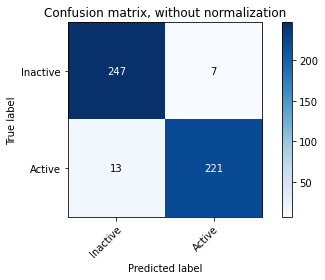

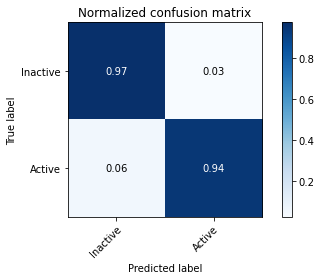

In [21]:
y_pred = svc.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
ax, cmsvc = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
Sensibilidade=100*cmsvc[1][1] / (cmsvc[1][1] + cmsvc[1][0])
Seletividade=100*cmsvc[0][0] / (cmsvc[0][0] + cmsvc[0][1])
Exatidão=100*(cmsvc[1][1] + cmsvc[0][0]) / (cmsvc[1][1] + cmsvc[1][0] + cmsvc[0][1] + cmsvc[0][0])

print("Os parametros do Modelo Classificatorio criado são:\nSensibilidade de {:.2f}% \nSeletividade de {:.2f}% \nExatidão de {:.2f}%".format(Sensibilidade,Seletividade,Exatidão))

Os parametros do Modelo Classificatorio criado são:
Sensibilidade de 94.44% 
Seletividade de 97.24% 
Exatidão de 95.90%


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters_SVC = {"C":range(51,300)
                  ,"kernel":("rbf","poly","sigmoid"),
                  "gamma":("scale","auto"),
                  "decision_function_shape":("ovo","ovr")
                                            }
SVC_grid = GridSearchCV(svc, parameters_SVC, cv=5)
SVC_grid.fit(X_train,y_train)
print(SVC_grid.score(X_train,y_train))
print(SVC_grid.predict(X_test))
print(SVC_grid.best_params_)

In [23]:
# Regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
X_svr, y_svr = make_regression(n_samples=1628, random_state=200)
regr_svr = SVR(C=51,gamma="auto", kernel= 'rbf').fit(X_train_reg, y_train_reg)
pred_svr = regr_svr.predict(X_test_reg)
print(pred_svr)

[ 4.86757788  5.37737753  5.3109505   5.01872284  5.21880256  6.89442652
  7.5905012   4.95277143  7.50679743  6.54842703  7.71570797  7.034234
  8.78250059  4.99668744  3.93019611  7.59161823  7.77348416  7.19890848
  5.1232768   6.50653794  5.19178845  7.80965894  6.9734448   6.73718996
  5.06047432  4.85068518  4.90845431  7.1235035   5.43891177  3.42527769
  4.55796283  6.65471424  4.94273155  7.27651764  5.06825117  3.74281409
  8.02439658  8.32096983  6.76149411  6.81253494  5.69078216  4.67447017
  6.75783474  4.58030462  5.53121512  6.92309474  8.07184778  7.50980663
  6.98823886  4.50186663 10.1336575   7.19619091  4.73344758  7.45885694
  6.86178853  8.08952101  6.78665339  5.27242518  3.85148067  4.91000129
  5.12271445  5.21186309  2.87366204  3.38456432  4.26173866  7.28098712
  3.14427206  6.74424154  4.87317864  7.51857703  4.85177418  8.11060909
  5.11607989  4.91951976  7.55993929  6.78174052  8.42984184  3.95411876
  5.33585984  7.88693474  7.54026813  4.63721429  5.0

y=0.888518x+(0.650504)


0.9333015153798829

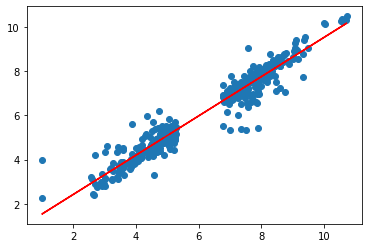

In [72]:
plt.scatter(y_test_reg,pred_svr)
z = np.polyfit(y_test_reg,pred_svr, 1)
p = np.poly1d(z)
plt.plot(y_test_reg,p(y_test_reg),"r")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
r2_score(y_test_reg,pred_svr)

#  Multi Layer Perceptron Classificator (MLPC) Model

In [25]:
from sklearn.neural_network import MLPClassifier
MLPC = MLPClassifier(solver = 'adam', 
                     alpha = 1e-10,
                    hidden_layer_sizes = (5,5),
                     random_state = 200)
MLPC.fit(X_train, y_train)  

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=1e-10, hidden_layer_sizes=(5, 5), random_state=200)

In [26]:
MLPC.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,

In [27]:
MLPC.predict_proba(X_test)

array([[9.96742145e-01, 3.25785538e-03],
       [9.89242362e-01, 1.07576379e-02],
       [9.74476474e-01, 2.55235257e-02],
       [9.89344292e-01, 1.06557076e-02],
       [9.84763231e-01, 1.52367689e-02],
       [4.17264068e-02, 9.58273593e-01],
       [2.08977950e-02, 9.79102205e-01],
       [1.85077005e-05, 9.99981492e-01],
       [7.03726523e-03, 9.92962735e-01],
       [6.65410381e-04, 9.99334590e-01],
       [9.88699830e-01, 1.13001696e-02],
       [1.19738914e-04, 9.99880261e-01],
       [4.92395601e-04, 9.99507604e-01],
       [1.32078045e-01, 8.67921955e-01],
       [3.90074490e-06, 9.99996099e-01],
       [8.19829915e-01, 1.80170085e-01],
       [9.99723937e-01, 2.76063263e-04],
       [2.08074952e-03, 9.97919250e-01],
       [5.89034522e-03, 9.94109655e-01],
       [6.13270035e-09, 9.99999994e-01],
       [1.70933805e-03, 9.98290662e-01],
       [7.92565499e-01, 2.07434501e-01],
       [9.50998374e-01, 4.90016263e-02],
       [9.92375294e-01, 7.62470633e-03],
       [1.211965

C:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Confusion matrix, without normalization
[[248   6]
 [ 11 223]]
Normalized confusion matrix
[[0.97637795 0.02362205]
 [0.04700855 0.95299145]]


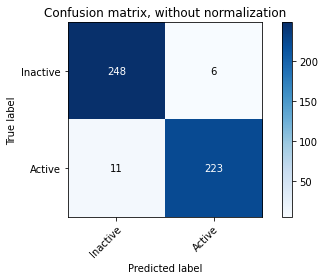

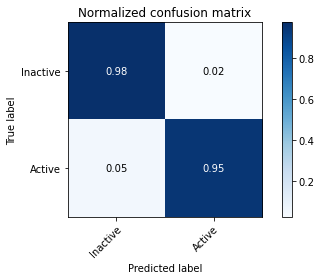

In [29]:

y_pred = MLPC.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
ax,cmMLPC = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [30]:
Sensibilidade=100*cmMLPC[1][1] / (cmMLPC[1][1] + cmMLPC[1][0])
Seletividade=100*cmMLPC[0][0] / (cmMLPC[0][0] + cmMLPC[0][1])
Exatidão=100*(cmMLPC[1][1] + cmMLPC[0][0]) / (cmMLPC[1][1] + cmMLPC[1][0] + cmMLPC[0][1] + cmMLPC[0][0])

print("Os parametros do Modelo Classificatorio criado são:\nSensibilidade de {:.2f}% \nSeletividade de {:.2f}% \nExatidão de {:.2f}%".format(Sensibilidade,Seletividade,Exatidão))

Os parametros do Modelo Classificatorio criado são:
Sensibilidade de 95.30% 
Seletividade de 97.64% 
Exatidão de 96.52%


In [ ]:
a = [(i,i) for i in range (0,75,5)]

parameters_MLPC = {"hidden_layer_sizes": a,
                   "solver":["adam"],
                   "alpha":[0.0001,0.0000000001],
                   "random_state":[1,200]}
MLPC_grid = GridSearchCV(MLPC, parameters_MLPC, cv=5)
MLPC_grid.fit(X_train,y_train)
print(MLPC_grid.score(X_train,y_train))
print(MLPC_grid.predict(X_test))
print(MLPC_grid.best_params_)

In [34]:
#Regression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1628, random_state=200)

regr_MLPR = MLPRegressor(solver = 'adam', 
                     alpha = 1e-10,
                    hidden_layer_sizes = (5,5),
                     random_state = 200).fit(X_train_reg, y_train_reg)
pred_MLPR = regr_MLPR.predict(X_test_reg)



C:\Users\usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


y=0.879256x+(0.685818)


0.8862949550950353

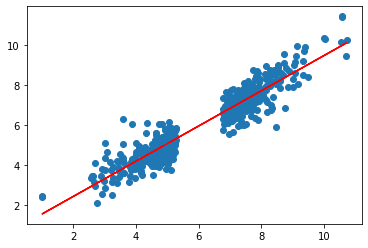

In [73]:
plt.scatter(y_test_reg,pred_MLPR)
z = np.polyfit(y_test_reg,pred_MLPR, 1)
p = np.poly1d(z)
plt.plot(y_test_reg,p(y_test_reg),"r")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
r2_score(y_test_reg,pred_MLPR)

# K-NN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 35)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.predict_proba(X_test))

0.6175438596491228
[[0.54285714 0.45714286]
 [0.37142857 0.62857143]
 [0.65714286 0.34285714]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.54285714 0.45714286]
 [0.42857143 0.57142857]
 [0.31428571 0.68571429]
 [0.4        0.6       ]
 [0.48571429 0.51428571]
 [0.62857143 0.37142857]
 [0.45714286 0.54285714]
 [0.57142857 0.42857143]
 [0.42857143 0.57142857]
 [0.51428571 0.48571429]
 [0.65714286 0.34285714]
 [0.65714286 0.34285714]
 [0.48571429 0.51428571]
 [0.48571429 0.51428571]
 [0.62857143 0.37142857]
 [0.48571429 0.51428571]
 [0.6        0.4       ]
 [0.51428571 0.48571429]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.45714286 0.54285714]
 [0.51428571 0.48571429]
 [0.51428571 0.48571429]
 [0.62857143 0.37142857]
 [0.57142857 0.42857143]
 [0.68571429 0.31428571]
 [0.48571429 0.51428571]
 [0.62857143 0.37142857]
 [0.6        0.4       ]
 [0.57142857 0.42857143]
 [0.57142857 0.42857143]
 [0.4        0.6       ]
 [0.51428571 0.48571429]
 [0.37142857 0.62857143]
 [0.31

Confusion matrix, without normalization
[[204  50]
 [145  89]]
Normalized confusion matrix
[[0.80314961 0.19685039]
 [0.61965812 0.38034188]]


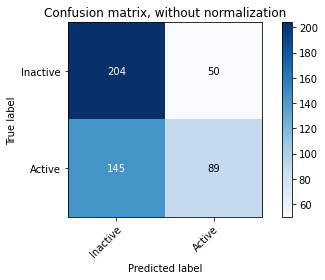

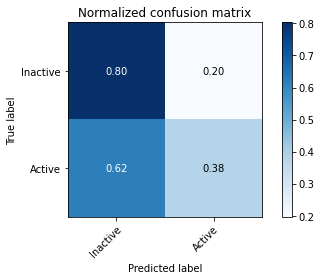

In [37]:
y_pred = knn.fit(X_train, y_train).predict(X_test)
# Plot non-normalized confusion matrix
ax, cmknn = plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [38]:
Sensibilidade=100*cmknn[1][1] / (cmknn[1][1] + cmknn[1][0])
Seletividade=100*cmknn[0][0] / (cmknn[0][0] + cmknn[0][1])
Exatidão=100*(cmknn[1][1] + cmknn[0][0]) / (cmknn[1][1] + cmknn[1][0] + cmknn[0][1] + cmknn[0][0])

print("Os parametros do Modelo Classificatorio criado são:\nSensibilidade de {:.2f}% \nSeletividade de {:.2f}% \nExatidão de {:.2f}%".format(Sensibilidade,Seletividade,Exatidão))

Os parametros do Modelo Classificatorio criado são:
Sensibilidade de 38.03% 
Seletividade de 80.31% 
Exatidão de 60.04%


In [ ]:
knn_grid = GridSearchCV(knn,{'n_neighbors':range(1,800)},cv = 5)
knn_grid.fit(X_train,y_train)
print(knn_grid.score(X_train,y_train))
print(knn_grid.best_params_)

In [40]:
#Regression
from sklearn.neighbors import KNeighborsRegressor
neigh_reg = KNeighborsRegressor(n_neighbors=35).fit(X_train_reg, y_train_reg)
pred_neigh= neigh_reg.predict(X_test_reg)


y=0.046067x+(5.860378)


0.04584786654002104

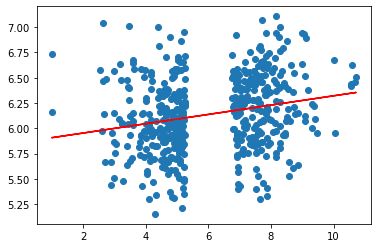

In [75]:
plt.scatter(y_test_reg,pred_neigh)
z = np.polyfit(y_test_reg,pred_neigh, 1)
p = np.poly1d(z)
plt.plot(y_test_reg,p(y_test_reg),"r")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
r2_score(y_test_reg,pred_neigh)